# Exercises: Solutions
### by Erbil, Furkan

## Day 1

## 1)

## 2)

In [7]:
#Turn all letters in the sequence into uppercase
def upperCaseMachine(seqX):
    if seqX.isupper():
        return seqX
    else:
        return seqX.upper()
    

#Check if only allowed letter regarding DNA are used
def CheckDNA(seqX):
    if all(l in DNA_Letters for l in seqX):
        print('Your DNA Sequence is fantastic.')
    else:
        print('Please, modify your DNA.')
        

#Compare other sequences to seq1 if they are contained
def compareSequence(seqX):
    try:
        seq1.index(seqX)
    except ValueError:
        print('Sadly, not a subsequence.')
    else:
        print('It is a subsequence of seq1.')

        
#Test
DNA_Letters = "ACTG"       
seq1 = "actgtacgtagcatgac"
seq2 = "CAT"
seq3 = "CATCAT"

seq1 = upperCaseMachine(seq1)
print(seq1)

CheckDNA(seq1)

compareSequence(seq2)
compareSequence(seq3)

ACTGTACGTAGCATGAC
Your DNA Sequence is fantastic.
It is a subsequence of seq1.
Sadly, not a subsequence.


## 3)

### Output sequences

In [8]:
from Bio import SeqIO

file = "Files Exercise 1/Sars_cov_2.ASM985889v3.cds.all.fa"
seq_pairs = []

#Create tuples for each id and its sequence
for seq_record in SeqIO.parse(file, "fasta"):
    seq_pairs.append((seq_record.id, seq_record.seq))


#Put an id of a sequence to show its sequence (within a (id, sequence) pair)
def findSequenceWithID (seq_id):
    for seq_pair in seq_pairs:
        if seq_id in seq_pair[0]:
            print("Your sequence pair: ", seq_pair)
            
#Test
print(seq_pairs[0])
id = 'ENSSAST00005000002.1'
findSequenceWithID(id)


('ENSSAST00005000002.1', Seq('ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTG...TAA'))
Your sequence pair:  ('ENSSAST00005000002.1', Seq('ATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTG...TAA'))


### Features

## Day 2

## 1)

### Restriction Enzymes 

### Initial Setup


In [9]:
from Bio import SeqIO

#Read and output data of the file containing my chosen Restriction Enzymes. Sequences are stored for later.
RE_sequences = []
file = "Files Exercise 2/RestrictionEnzymes.fasta"
for initSeq in SeqIO.parse(file, "fasta"):
    print(initSeq.id)
    print(repr(initSeq.seq))
    print(len(initSeq))
    RE_sequences.append(str(initSeq.seq))

Restriction_Enzyme_Aaal|From_5'_to_3'_cuts_after_first_appearing_Cytosin_("C")
Seq('CGGCCG')
6
Restriction_Enzyme_Blfl_(Bacillus_licheniformis)|From_5'_to_3'_cuts_after_first_appearing_Thymin
Seq('TCCGGA')
6
Restriction_Enzyme_Dmal_(Deleya_marina)|From_5'_to_3'_cuts_after_triplet_"CAG"
Seq('CAGCTG')
6
Restriction_Enzyme_Falll_(Flavobacterium_aquatile_Ob10)|From_5'_to_3'_cuts_after_first_appearing_pair_"CG"
Seq('CGCG')
4
Restriction_Enzyme_Taql_(Thermus_aquaticus)|From_5'_to_3'_cuts_after_first_appearing_Thymin_("T")
Seq('TCGA')
4


### Input

In [10]:
#Put in your desired DNA
 #Hint: Paste in CGGCCGTCCGGACAGCTGCGCGTCGA to test all (spoiler: it worked for me :))
DNA_input = str(input())

CGCG


### DNA Cleavage

In [11]:
#cleave DNA at recognized sequence (pos) and cut at the correct position (cut_pos)
def cleaveDNA(pos, cut_pos):
    DNA_part_1 = DNA_input[: pos+cut_pos]
    DNA_part_2 = DNA_input[pos+cut_pos: ]
    Cleaved_DNA = DNA_part_1 + " " + DNA_part_2
    print(Cleaved_DNA)
    
#Test DNA input for all Restriction Enzymes
if DNA_input.find(RE_sequences[0]) != -1 or DNA_input == RE_sequences[0]:
        Aaal_pos = DNA_input.find(RE_sequences[0])
        cleaveDNA(Aaal_pos, 1)
        
if DNA_input.find(RE_sequences[1]) != -1 or DNA_input == RE_sequences[1]:
        Blfl_pos = DNA_input.find(RE_sequences[1])
        cleaveDNA(Blfl_pos, 1)

if DNA_input.find(RE_sequences[2]) != -1 or DNA_input == RE_sequences[2]:
        Dmal_pos = DNA_input.find(RE_sequences[2])
        cleaveDNA(Dmal_pos, 3)
        
if DNA_input.find(RE_sequences[3]) != -1 or DNA_input == RE_sequences[3]:
        Falll_pos = DNA_input.find(RE_sequences[3])
        cleaveDNA(Falll_pos, 2)
        
if DNA_input.find(RE_sequences[4]) != -1 or DNA_input == RE_sequences[4]:
        Taql_pos = DNA_input.find(RE_sequences[4])
        cleaveDNA(Taql_pos, 1)


CG CG


## 2)

### Initial Setup

In [12]:
from Bio import SeqIO

#Read and output general data of the file
file = "Files Exercise 2/DSiBI-exercises-Day2_Sample_Sequence.fasta"
for initSeq in SeqIO.parse(file, "fasta"):
    print(initSeq.id)
    print(repr(initSeq.seq))
    print(len(initSeq))


Sample_Sequence_from_strands_to_strings_20221017
Seq('tttaaaagaaggtcaaatcaatgatatgattttatctcttcttagtaaaggtag...aag')
4000


### Prepare DNA sequence

In [15]:
#Convert sequence into a string to make comparisms and additionally to upperCase
seq = str(initSeq.seq).upper()
ORF_count = 0
DNA_sequences = []

for pos_start in range(0, len(seq)):
    
    #Get position of very first start codon
    pos_start = seq.find("ATG")
    #print("pos_start ", pos_start)
    
    #No start codon? -> break
    if pos_start < 0:
        break
    
    
    #Calculate new start position (after start codon)
    new_seq = seq[pos_start+3:]
    
    #Split sequence into subsequences with length of 3
    split_seq = [new_seq[i:i+3] for i in range(0, len(new_seq), 3)]
    #print(split_seq)
    
    #Find very first stop codon and save whole sequence
    sub_seq = "ATG"
    for a in split_seq:
        if a == 'TAA':
            sub_seq += a
            DNA_sequences.append(sub_seq)
            ORF_count += 1
            break
        elif a == 'TAG':
            sub_seq += a
            DNA_sequences.append(sub_seq)
            ORF_count += 1
            break
        elif a == 'TGA':
            sub_seq += a
            DNA_sequences.append(sub_seq)
            ORF_count += 1
            break
        else:
            sub_seq += a
            
    #Calculate positions of stop codons (.rfind() returns -1 if not successful)
    pos_stop1 = sub_seq.rfind('TAA')
    pos_stop2 = sub_seq.rfind('TAG')
    pos_stop3 = sub_seq.rfind('TGA')
    #print("stops: ", pos_stop1, pos_stop2, pos_stop3)
    
    #Highest position is relevant since stop codons are at the end
    max_stop = max(pos_stop1, pos_stop2, pos_stop3)
    #print(max_stop)
    
    #If there are no stop codons max=-1
    if max_stop > -1:
        #Calculate new position for the next iteration (after stop codon of last sequence)
        newPosition = pos_start + max_stop + 3
        seq = seq[newPosition: ]


#Results        
print("ORF counts: ", ORF_count)
print("All DNA sequences:")
for x in DNA_sequences:
    print(x)

ORF counts:  2
All DNA sequences:
ATGATATGA
ATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAA

### Turn DNA into mRNA

In [16]:
#Generate complementary mRNA strings
mRNA_sequences = []
for x in DNA_sequences:
    x = x.replace("T", "U")
    mRNA_sequences.append(x)
    
    
#Results
print("Resulting mRNA sequences: ")
for m in mRNA_sequences:
    print(m)

Resulting mRNA sequences: 
AUGAUAUGA
AUGUUCUUGUUAACAACUAAACGAACAAUGUUUGUUUUUCUUGUUUUAUUGCCACUAGUCUCUAGUCAGUGUGUUAAUCUUACAACCAGAACUCAAUUACCCCCUGCAUACACUAAUUCUUUCACACGUGGUGUUUAUUACCCUGACAAAGUUUUCAGAUCCUCAGUUUUACAUUCAACUCAGGACUUGUUCUUACCUUUCUUUUCCAAUGUUACUUGGUUCCAUGCUAUACAUGUCUCUGGGACCAAUGGUACUAAGAGGUUUGAUAACCCUGUCCUACCAUUUAAUGAUGGUGUUUAUUUUGCUUCCACUGAGAAGUCUAACAUAAUAAGAGGCUGGAUUUUUGGUACUACUUUAGAUUCGAAGACCCAGUCCCUACUUAUUGUUAAUAACGCUACUAAUGUUGUUAUUAAAGUCUGUGAAUUUCAAUUUUGUAAUGAUCCAUUUUUGGGUGUUUAUUACCACAAAAACAACAAAAGUUGGAUGGAAAGUGAGUUCAGAGUUUAUUCUAGUGCGAAUAAUUGCACUUUUGAAUAUGUCUCUCAGCCUUUUCUUAUGGACCUUGAAGGAAAACAGGGUAAUUUCAAAAAUCUUAGGGAAUUUGUGUUUAAGAAUAUUGAUGGUUAUUUUAAAAUAUAUUCUAAGCACACGCCUAUUAAUUUAGUGCGUGAUCUCCCUCAGGGUUUUUCGGCUUUAGAACCAUUGGUAGAUUUGCCAAUAGGUAUUAACAUCACUAGGUUUCAAACUUUACUUGCUUUACAUAGAAGUUAUUUGACUCCUGGUGAUUCUUCUUCAGGUUGGACAGCUGGUGCUGCAGCUUAUUAUGUGGGUUAUCUUCAACCUAGGACUUUUCUAUUAAAAUAUAAUGAAAAUGGAACCAUUACAGAUGCUGUAGACUGUGCACUUGACCCUCUCUCAGAAACAAAGUGUACGUUGAAAUCCUUCACUGUAGAAAAAGGAAUC

### Determine Proteins of mRNA sequences

In [17]:
import pandas as pd

#Read and save table into a variable
codons = pd.read_csv('Files Exercise 2/DSiBI-exercises-Day2_codon.tsv', sep='\t')
#print(codons.keys())
#print(codons)


#Turn each mRNA sequence in triplets and encode them into amino acids 
 #Obtain sequence of amino acids/proteins as result
proteins = []
for m in mRNA_sequences:
    split_mRNA = [m[i:i+3] for i in range(0, len(m), 3)]
    amino_seq = ""
    for s in split_mRNA:
        for a in range(0,len(codons.UUU)-1):
            if s == codons.UUU[a]:
                amino_seq += codons.F[a]
                amino_seq += "-"
    proteins.append(amino_seq[:-1])
    
#Results
print("Resulting proteins :")
for p in proteins:
    print(p)

Resulting proteins :
M-I-Stop
M-F-L-L-T-T-K-R-T-M-V-L-V-L-L-P-L-V-S-S-Q-C-V-N-L-T-T-R-T-Q-L-P-P-A-T-T-N-S-F-T-R-G-V-T-T-P-D-K-V-F-R-S-S-V-L-H-S-T-Q-D-L-F-L-P-F-S-N-V-T-W-F-H-A-I-H-V-S-T-N-G-T-K-R-D-N-P-V-L-P-N-D-G-V-T-A-S-T-E-K-S-N-I-I-R-G-W-I-G-T-T-L-D-S-K-T-Q-S-L-L-I-V-N-N-A-T-N-V-V-I-K-V-C-E-Q-C-N-D-P-L-G-V-T-T-H-K-N-N-K-S-W-M-E-S-E-F-R-V-T-S-S-A-N-N-C-T-E-T-V-S-Q-P-L-M-D-L-E-G-K-Q-G-N-F-K-N-L-R-E-V-K-N-I-D-G-T-K-I-T-S-K-H-T-P-I-N-L-V-R-D-L-P-Q-G-S-A-L-E-P-L-V-D-L-P-I-G-I-N-I-T-R-Q-T-L-L-A-L-H-R-S-T-L-T-P-G-D-S-S-S-G-W-T-A-G-A-A-A-T-T-V-G-T-L-Q-P-R-T-L-L-K-T-N-E-N-G-T-I-T-D-A-V-D-C-A-L-D-P-L-S-E-T-K-C-T-L-K-S-F-T-V-E-K-G-I-T-Q-T-S-N-R-V-Q-P-T-E-S-I-V-R-P-N-I-T-N-L-C-P-G-E-V-N-A-T-R-A-S-V-T-A-W-N-R-K-R-I-S-N-C-V-A-D-T-S-V-L-T-N-S-A-S-S-T-K-C-T-G-V-S-P-T-K-L-N-D-L-C-T-N-V-T-A-D-S-V-I-R-G-D-E-V-R-Q-I-A-P-Q-T-G-K-I-A-D-T-N-T-K-L-P-D-D-T-G-C-V-I-A-W-N-S-N-N-L-D-S-K-V-G-G-N-T-N-T-L-T-R-L-R-K-S-N-L-K-P-E-R-D-I-S-T-E-I-T-Q-A-G-S-T-P-C-N-G-V-E-G-N-C-T-P-L-Q-S-T-G-F-Q-P-T-N-G-V-G-T-Q-P-T-R-V-

### Write output into a file

In [18]:
with open('My Output Files/ProteinSequence.txt', 'w') as f:
    for p in proteins:
        p += "\n"
        f.write(p)

## Day3

## 1)

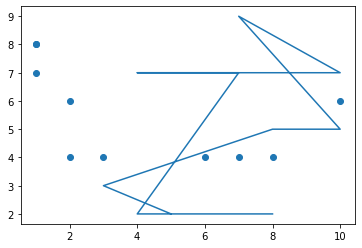

In [2]:
import matplotlib.pyplot as plt
import random

x = [random.randint(1, 10) for n in range(10)]
y = [random.randint(1, 10) for n in range(10)]

x2 = [random.randint(1, 10) for n in range(10)]
y2 = [random.randint(1, 10) for n in range(10)]

plt.scatter(x, y)
plt.plot(x2, y2)
plt.show()

## 2)

## 3)

### a)

### b)

### c)